In [1]:
# Imports for the practical
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing


df = pd.read_csv("/Users/shanmukhvalluru/Desktop/University/2024 - Semester 1/COMP4702/Practicals/83_Loeschcke_et_al_2000_Thorax_&_wing_traits_lab pops.csv")
df.head() # Prints the first 5 rows of the dataset

Species Population  Latitude  Longitude  Year_start  Year_end  \
0  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
1  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
2  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
3  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
4  D._aldrichi    Binjour    -25.52     151.45        1994      1994   

   Temperature  Vial  Replicate     Sex Thorax_length     l2    l3p    l3d  \
0           20     1          1  female         1.238  2.017  0.659  1.711   
1           20     1          1    male         1.113  1.811  0.609  1.539   
2           20     1          2  female         1.215  1.985  0.648  1.671   
3           20     1          2    male         1.123  1.713  0.596  1.495   
4           20     2          1  female         1.218  1.938  0.641  1.658   

     lpd     l3     w1     w2     w3 wing_loading  
0  2.370  2.370  1.032  1.441  1.192        1.914  
1  2.148  2.146  0.938  1.299  1.066        1.928  
2  2.319  2.319  0.991  1.396  1.142        1.908  
3  2.091  2.088  0.958  1.286  1.062        1.860  
4  2.298  2.298  1.010  1.418  1.148        1.886

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        1731 non-null   object 
 1   Population     1731 non-null   object 
 2   Latitude       1731 non-null   float64
 3   Longitude      1731 non-null   float64
 4   Year_start     1731 non-null   int64  
 5   Year_end       1731 non-null   int64  
 6   Temperature    1731 non-null   int64  
 7   Vial           1731 non-null   int64  
 8   Replicate      1731 non-null   int64  
 9   Sex            1731 non-null   object 
 10  Thorax_length  1731 non-null   object 
 11  l2             1731 non-null   float64
 12  l3p            1731 non-null   float64
 13  l3d            1731 non-null   float64
 14  lpd            1731 non-null   float64
 15  l3             1731 non-null   float64
 16  w1             1731 non-null   float64
 17  w2             1731 non-null   float64
 18  w3      

In [3]:
df.isna().sum()

Species          0
Population       0
Latitude         0
Longitude        0
Year_start       0
Year_end         0
Temperature      0
Vial             0
Replicate        0
Sex              0
Thorax_length    0
l2               0
l3p              0
l3d              0
lpd              0
l3               0
w1               0
w2               0
w3               0
wing_loading     0
dtype: int64

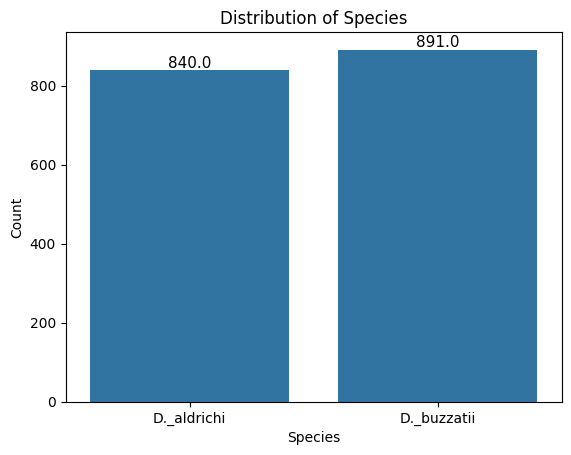

In [4]:
sns.countplot(x='Species', data=df)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')
    
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [5]:
(df['Species'] == 'D._aldrichi').sum()

840

In [6]:
df[["Thorax_length"]]


Thorax_length
0            1.238
1            1.113
2            1.215
3            1.123
4            1.218
...            ...
1726         1.033
1727         1.138
1728         1.019
1729         1.118
1730         1.060

[1731 rows x 1 columns]

# Data Pre-processing

In [7]:
numeric_data = df[["Thorax_length", "l2", "l3p", 
                              "l3d", "lpd", "l3", "w1", "w2","w3","wing_loading"]]

numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')

In [8]:
numeric_data.isna().sum()

Thorax_length    1
l2               0
l3p              0
l3d              0
lpd              0
l3               0
w1               0
w2               0
w3               0
wing_loading     1
dtype: int64

In [9]:
numeric_data = numeric_data.dropna(subset=['wing_loading', 'Thorax_length'])

In [10]:
numeric_data["Thorax_length"].describe()

count    1730.000000
mean        1.126503
std         0.065599
min         0.931000
25%         1.081000
50%         1.126000
75%         1.172000
max         1.299000
Name: Thorax_length, dtype: float64

In [11]:
numeric_data.isna().sum()

Thorax_length    0
l2               0
l3p              0
l3d              0
lpd              0
l3               0
w1               0
w2               0
w3               0
wing_loading     0
dtype: int64

# Univariate EDA

In [12]:
numeric_data["Thorax_length"].describe()



count    1730.000000
mean        1.126503
std         0.065599
min         0.931000
25%         1.081000
50%         1.126000
75%         1.172000
max         1.299000
Name: Thorax_length, dtype: float64

<Axes: title={'center': 'Distribution of Thorax_length'}, ylabel='Frequency'>

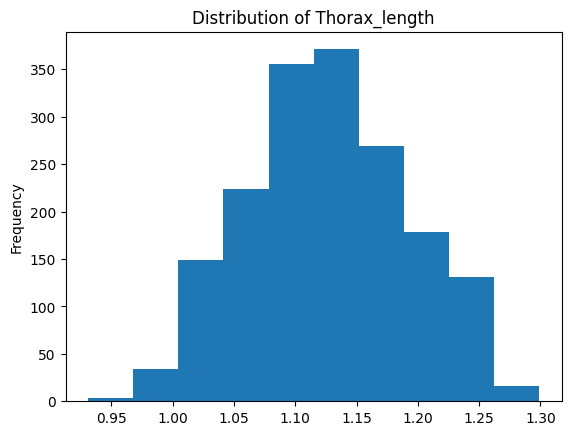

In [13]:
numeric_data["Thorax_length"].plot.hist(grid=False, bins=10, title="Distribution of Thorax_length")

In [14]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1730 entries, 0 to 1730
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Thorax_length  1730 non-null   float64
 1   l2             1730 non-null   float64
 2   l3p            1730 non-null   float64
 3   l3d            1730 non-null   float64
 4   lpd            1730 non-null   float64
 5   l3             1730 non-null   float64
 6   w1             1730 non-null   float64
 7   w2             1730 non-null   float64
 8   w3             1730 non-null   float64
 9   wing_loading   1730 non-null   float64
dtypes: float64(10)
memory usage: 148.7 KB


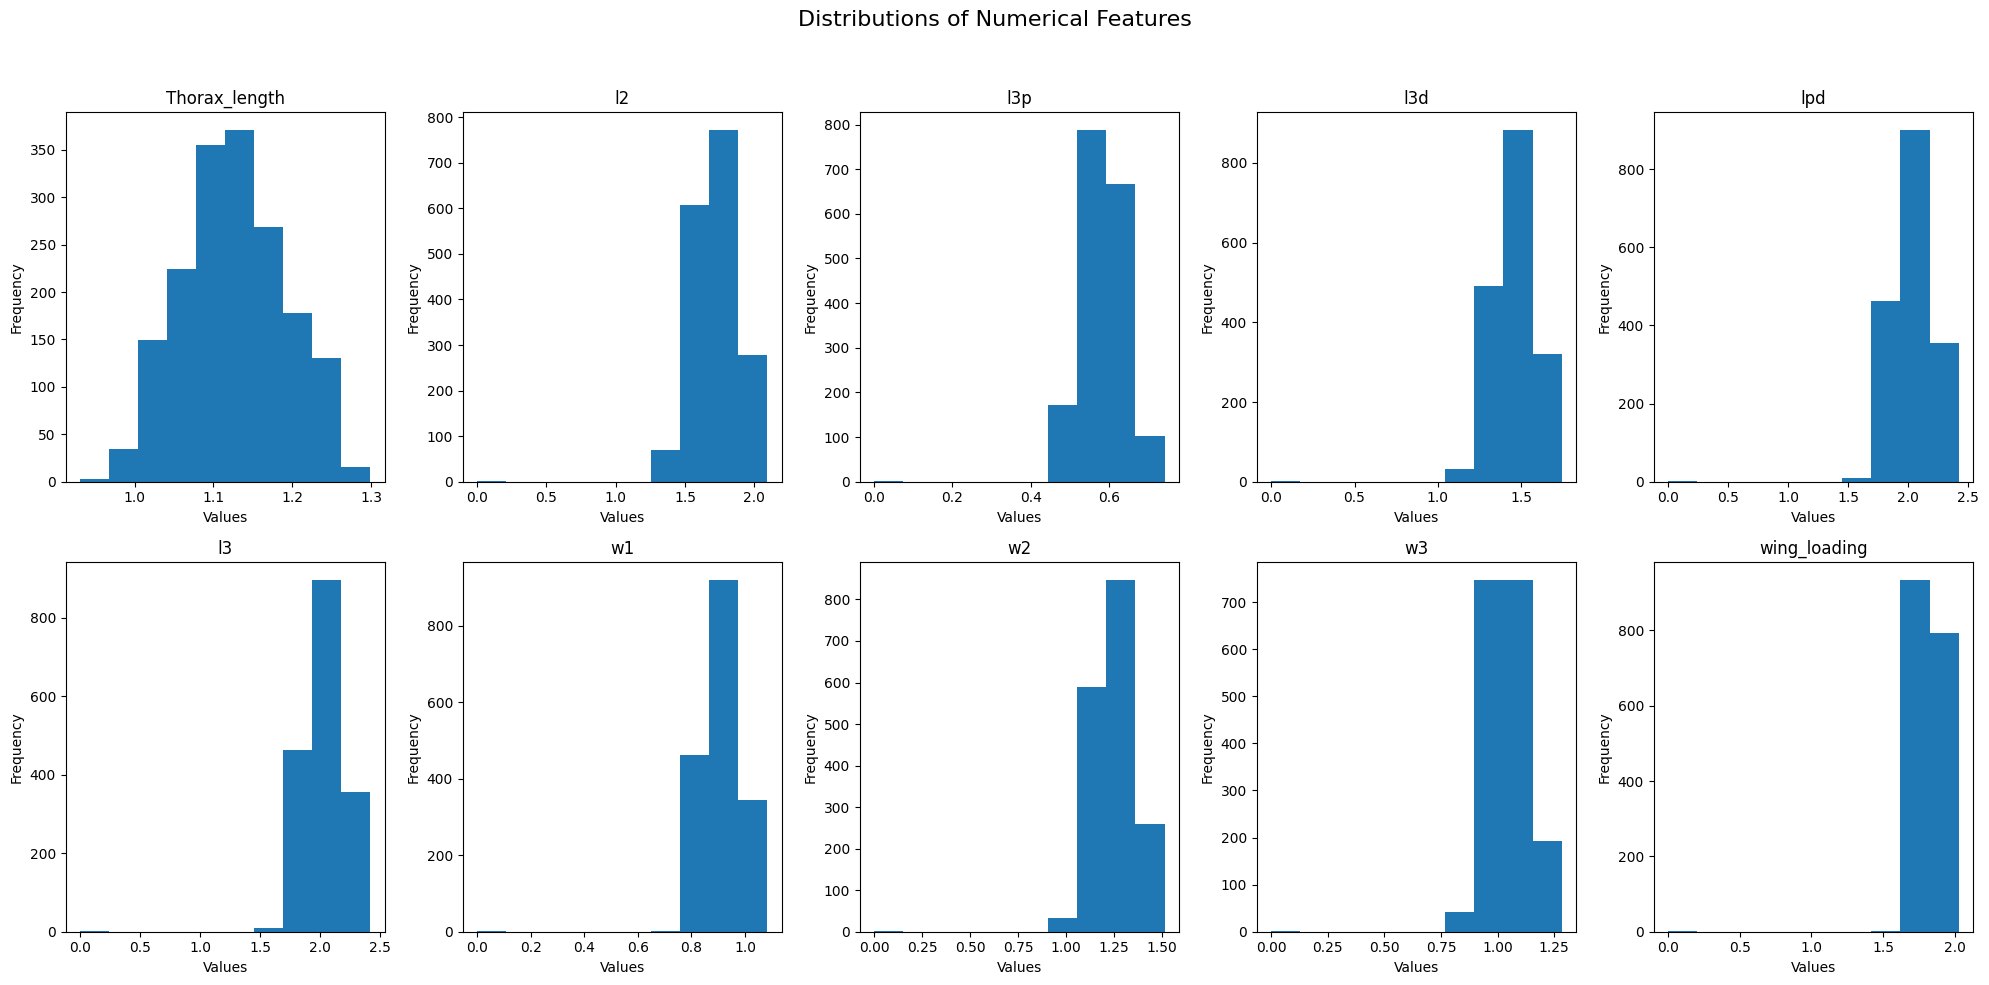

In [15]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle('Distributions of Numerical Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for ax, column in zip(axes, numeric_data.columns):
    numeric_data[column].plot.hist(ax=ax, bins=10, title=column, grid=False)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for ax in axes[len(numeric_data.columns):]:
    fig.delaxes(ax)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect parameter leaves space for the suptitle
plt.show()

In [16]:
(numeric_data['w3'] == 0).sum()

2

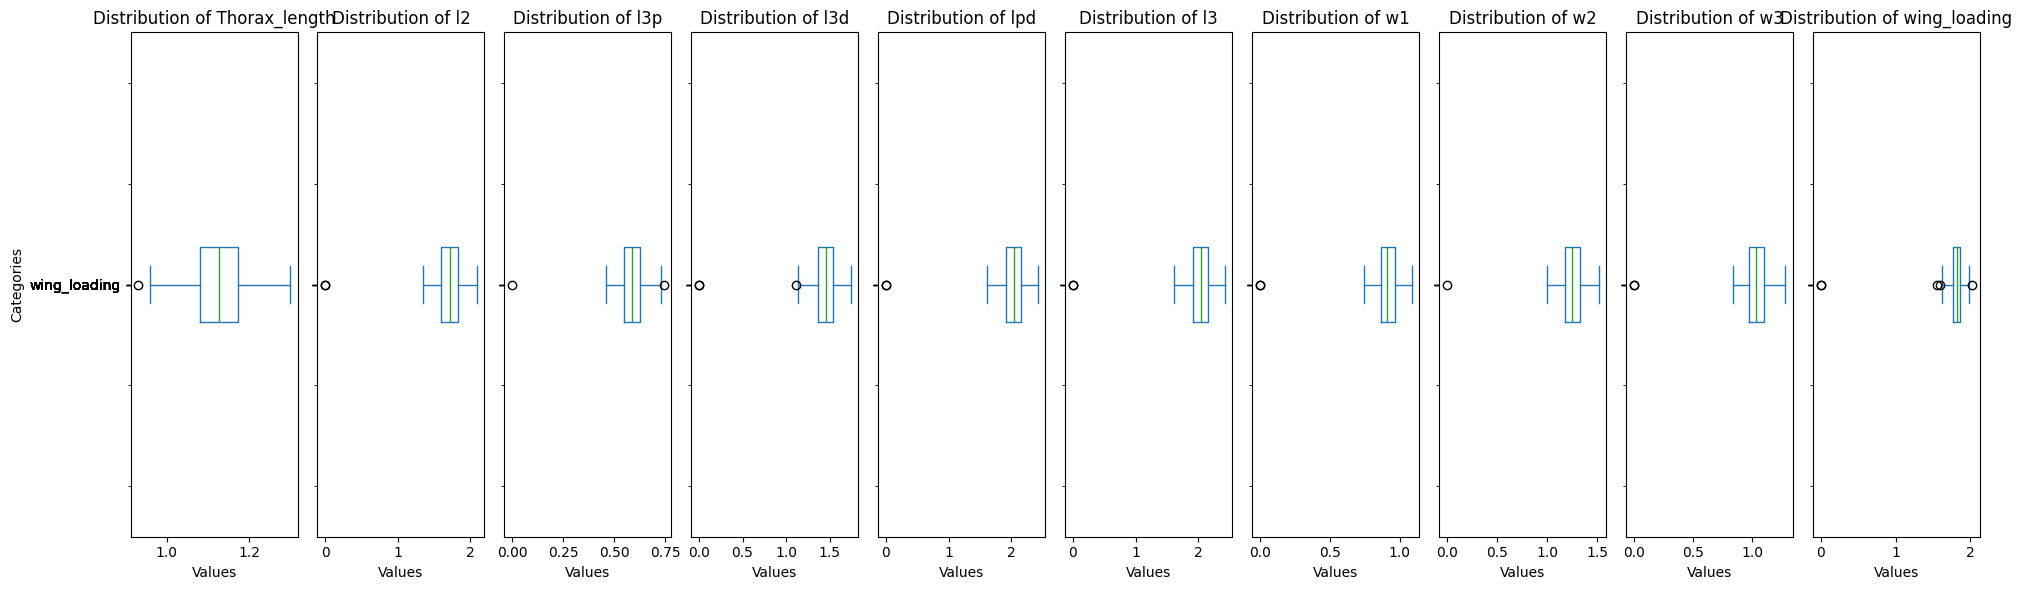

In [17]:
# Create a figure with 10 subplots
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 6), sharey=True)

# Plot each boxplot
for i, column in enumerate(numeric_data.columns):
    numeric_data[column].plot.box(ax=axes[i], vert=False, title=f"Distribution of {column}")
    axes[i].grid(False)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("")

# Set common ylabel
axes[0].set_ylabel("Categories")

plt.tight_layout()
plt.show()

In [18]:
numeric_data.shape

(1730, 10)

In [19]:
numeric_data.replace(0, np.nan, inplace=True)

# Drop rows with NaN values
numeric_data.dropna(inplace=True)

In [20]:
numeric_data.shape

(1728, 10)

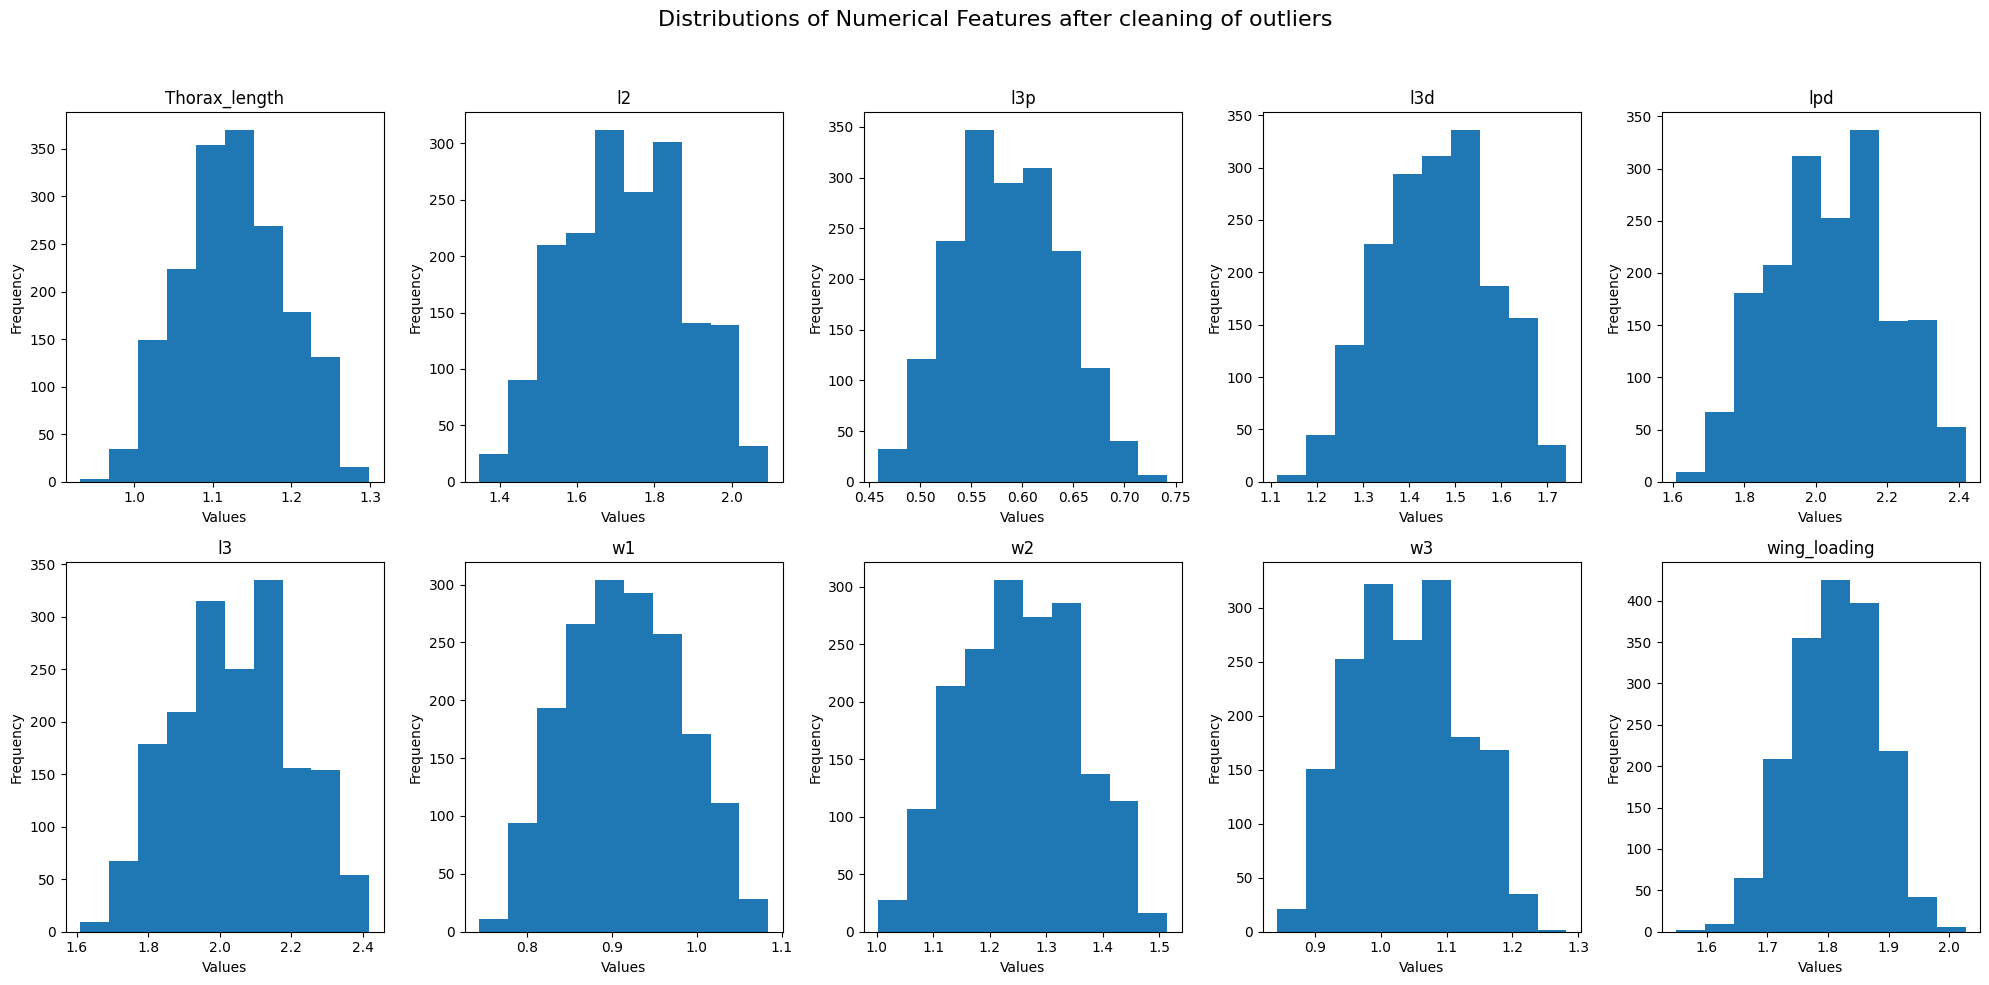

In [21]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle('Distributions of Numerical Features after cleaning of outliers', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for ax, column in zip(axes, numeric_data.columns):
    numeric_data[column].plot.hist(ax=ax, bins=10, title=column, grid=False)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for ax in axes[len(numeric_data.columns):]:
    fig.delaxes(ax)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect parameter leaves space for the suptitle
plt.show()

# Bivariate EDA

In [22]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy() #Creates another df that allows for encoding of the categorical variables

label_encoder = LabelEncoder()


df_encoded['Species']= label_encoder.fit_transform(df['Species']) 
df_encoded['Population']= label_encoder.fit_transform(df['Population'])  
df_encoded['Sex']= label_encoder.fit_transform(df['Sex']) 
df_encoded['Thorax_length']= label_encoder.fit_transform(df['Thorax_length']) 
df_encoded['wing_loading']= label_encoder.fit_transform(df['wing_loading']) 



correlation_matrix = df_encoded.corr()
plt.figure(figsize=(20,20), dpi = 480)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, 0 to 1730
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Thorax_length  1728 non-null   float64
 1   l2             1728 non-null   float64
 2   l3p            1728 non-null   float64
 3   l3d            1728 non-null   float64
 4   lpd            1728 non-null   float64
 5   l3             1728 non-null   float64
 6   w1             1728 non-null   float64
 7   w2             1728 non-null   float64
 8   w3             1728 non-null   float64
 9   wing_loading   1728 non-null   float64
dtypes: float64(10)
memory usage: 148.5 KB


In [24]:
#Correlation heatmap

numeric_data.corr().style.background_gradient(cmap='YlOrRd')

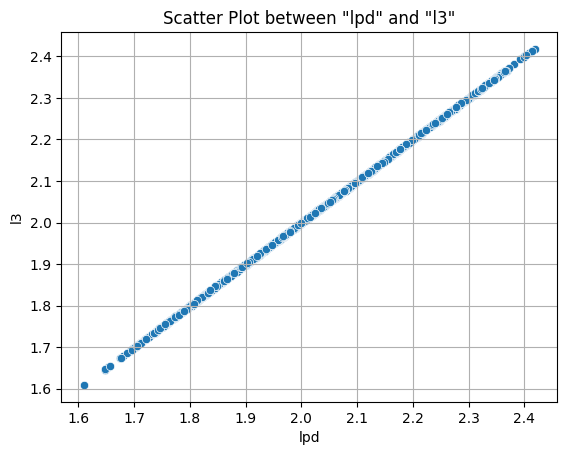

In [25]:
# Scatter plot using seaborn
sns.scatterplot(x='lpd', y='l3', data=numeric_data)

# Customizing the plot
plt.title('Scatter Plot between "lpd" and "l3"')
plt.xlabel('lpd')
plt.ylabel('l3')
plt.grid(True)

# Show the plot
plt.show()

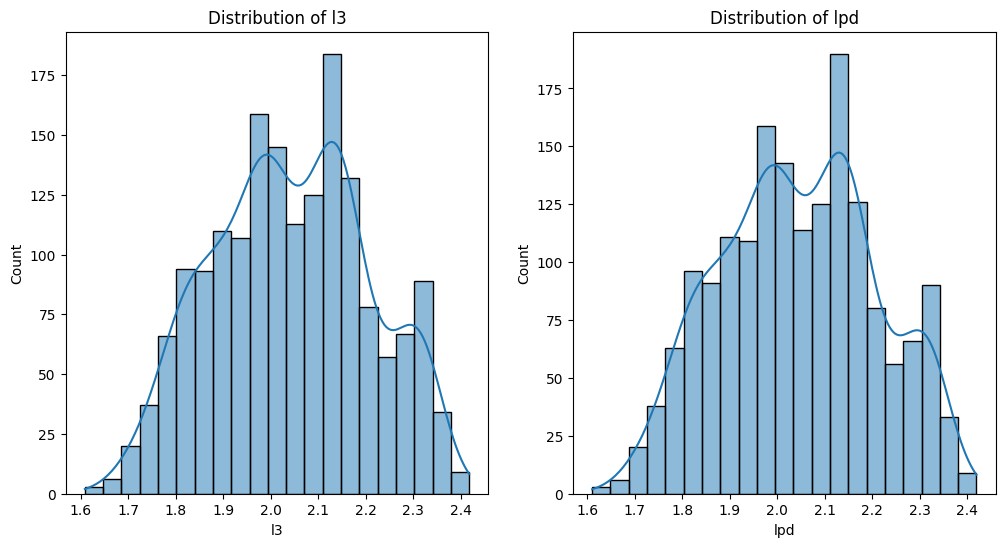

In [26]:
# Plot distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(numeric_data['l3'], kde=True)
plt.title('Distribution of l3')

plt.subplot(1, 2, 2)
sns.histplot(numeric_data['lpd'], kde=True)
plt.title('Distribution of lpd')

plt.show()

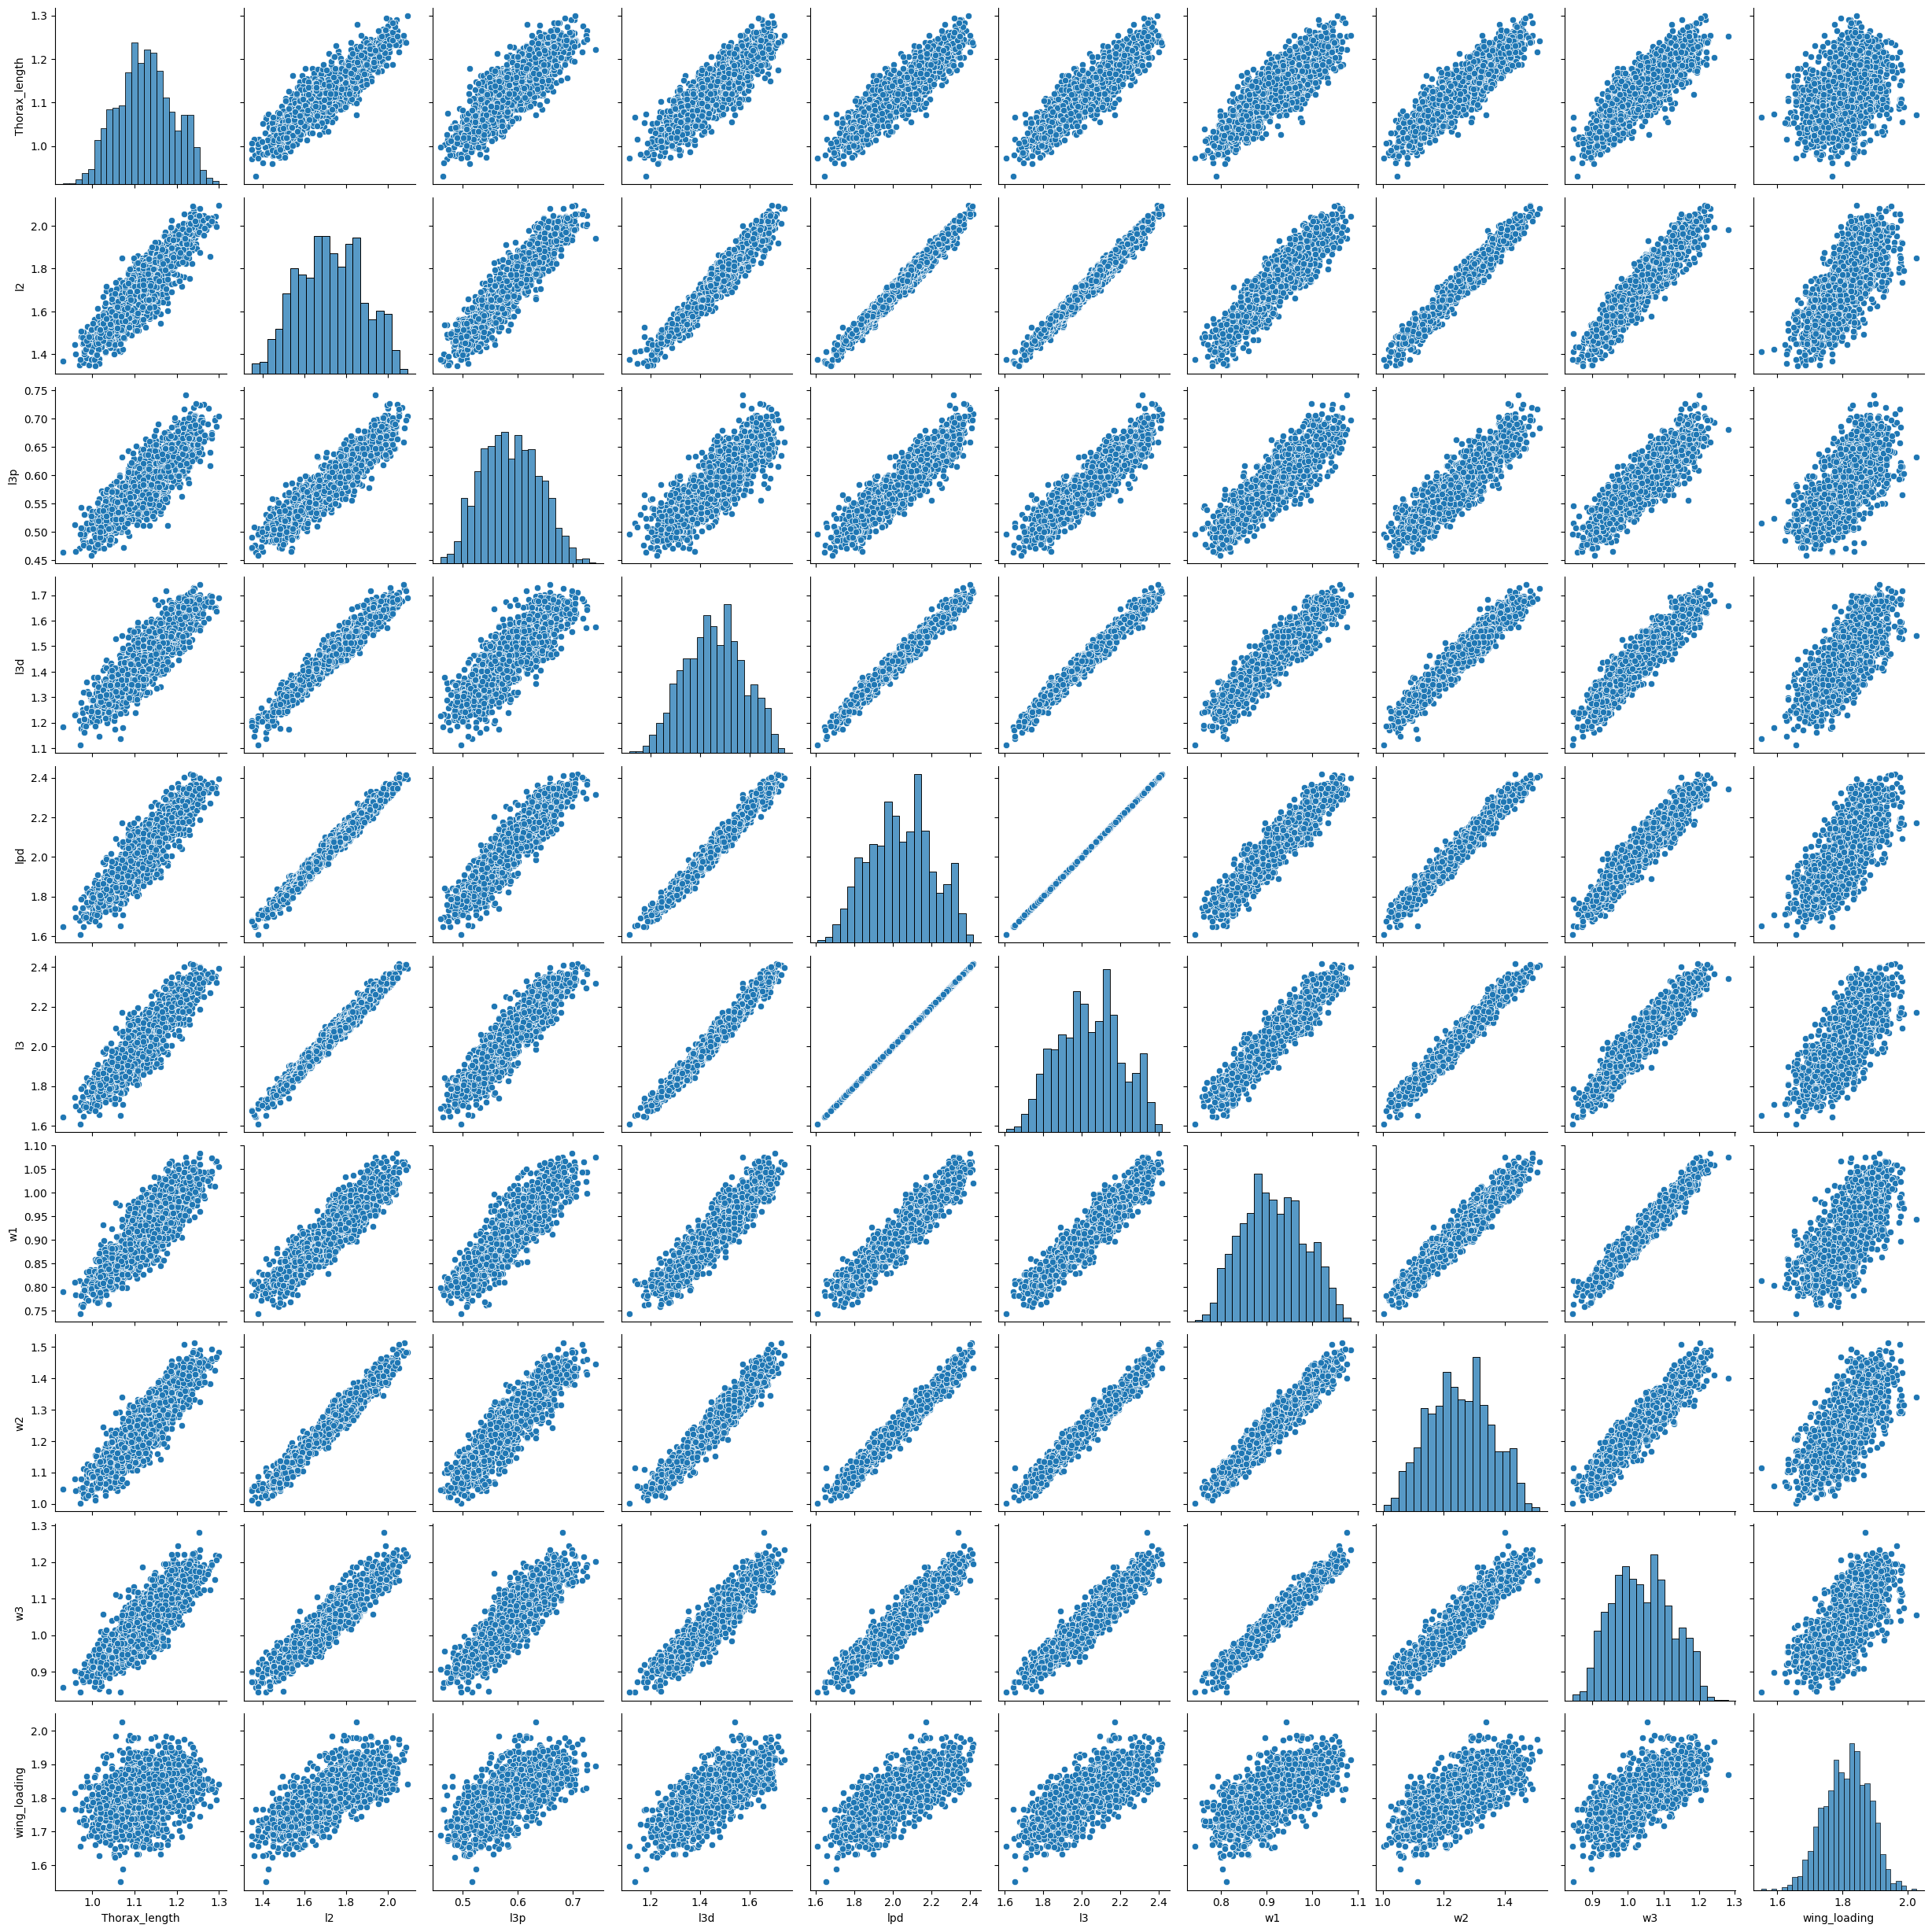

In [27]:
# Pair plot
sns.pairplot(numeric_data)
plt.show()

In [28]:
target = df_encoded['Species']

numeric_data['Species'] = target

In [29]:
# Calculate the Pearson correlation coefficient
correlation1 = numeric_data[['Species', 'lpd']].corr().iloc[0, 1]
print(f'Correlation coefficient between Species and lpd: {correlation1:.5f}')
correlation2 = numeric_data[['Species', 'l3']].corr().iloc[0, 1]
print(f'Correlation coefficient between Species and l3: {correlation2:.5f}')

Correlation coefficient between Species and lpd: 0.16689
Correlation coefficient between Species and l3: 0.16754


In [30]:
numeric_data = numeric_data.drop('lpd', axis=1)

numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, 0 to 1730
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Thorax_length  1728 non-null   float64
 1   l2             1728 non-null   float64
 2   l3p            1728 non-null   float64
 3   l3d            1728 non-null   float64
 4   l3             1728 non-null   float64
 5   w1             1728 non-null   float64
 6   w2             1728 non-null   float64
 7   w3             1728 non-null   float64
 8   wing_loading   1728 non-null   float64
 9   Species        1728 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 148.5 KB


In [31]:
numeric_data.describe()

Thorax_length           l2          l3p          l3d           l3  \
count    1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean        1.126501     1.725973     0.586193     1.457535     2.042683   
std         0.065632     0.154921     0.051768     0.118176     0.164430   
min         0.931000     1.347000     0.459000     1.114000     1.609000   
25%         1.081000     1.607000     0.547000     1.370000     1.920000   
50%         1.126000     1.722500     0.585000     1.457000     2.039500   
75%         1.172000     1.840000     0.624000     1.540250     2.159000   
max         1.299000     2.095000     0.742000     1.742000     2.418000   

                w1           w2           w3  wing_loading      Species  
count  1728.000000  1728.000000  1728.000000   1728.000000  1728.000000  
mean      0.915105     1.252947     1.039501      1.811679     0.515625  
std       0.067386     0.102529     0.082481      0.068179     0.499900  
min       0.744000     1.003000     0.843000      1.550000     0.000000  
25%       0.864000     1.176000     0.976000      1.765000     0.000000  
50%       0.912500     1.251000     1.037000      1.815000     1.000000  
75%       0.963000     1.326000     1.100000      1.862000     1.000000  
max       1.084000     1.514000     1.282000      2.027000     1.000000

In [32]:
fly_data = numeric_data.copy()

In [33]:
fly_data.head()

Thorax_length     l2    l3p    l3d     l3     w1     w2     w3  \
0          1.238  2.017  0.659  1.711  2.370  1.032  1.441  1.192   
1          1.113  1.811  0.609  1.539  2.146  0.938  1.299  1.066   
2          1.215  1.985  0.648  1.671  2.319  0.991  1.396  1.142   
3          1.123  1.713  0.596  1.495  2.088  0.958  1.286  1.062   
4          1.218  1.938  0.641  1.658  2.298  1.010  1.418  1.148   

   wing_loading  Species  
0         1.914        0  
1         1.928        0  
2         1.908        0  
3         1.860        0  
4         1.886        0

In [34]:
fly_data.describe()

Thorax_length           l2          l3p          l3d           l3  \
count    1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean        1.126501     1.725973     0.586193     1.457535     2.042683   
std         0.065632     0.154921     0.051768     0.118176     0.164430   
min         0.931000     1.347000     0.459000     1.114000     1.609000   
25%         1.081000     1.607000     0.547000     1.370000     1.920000   
50%         1.126000     1.722500     0.585000     1.457000     2.039500   
75%         1.172000     1.840000     0.624000     1.540250     2.159000   
max         1.299000     2.095000     0.742000     1.742000     2.418000   

                w1           w2           w3  wing_loading      Species  
count  1728.000000  1728.000000  1728.000000   1728.000000  1728.000000  
mean      0.915105     1.252947     1.039501      1.811679     0.515625  
std       0.067386     0.102529     0.082481      0.068179     0.499900  
min       0.744000     1.003000     0.843000      1.550000     0.000000  
25%       0.864000     1.176000     0.976000      1.765000     0.000000  
50%       0.912500     1.251000     1.037000      1.815000     1.000000  
75%       0.963000     1.326000     1.100000      1.862000     1.000000  
max       1.084000     1.514000     1.282000      2.027000     1.000000

In [35]:
fly_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, 0 to 1730
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Thorax_length  1728 non-null   float64
 1   l2             1728 non-null   float64
 2   l3p            1728 non-null   float64
 3   l3d            1728 non-null   float64
 4   l3             1728 non-null   float64
 5   w1             1728 non-null   float64
 6   w2             1728 non-null   float64
 7   w3             1728 non-null   float64
 8   wing_loading   1728 non-null   float64
 9   Species        1728 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 148.5 KB


# k-NN classifier

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [37]:
#Define features
X = fly_data.drop(columns=['Species'])
y = fly_data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# Set k value to 38
k = 38
knn = KNeighborsClassifier(n_neighbors=k)

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

# Calculate the mean cross-validated accuracy
mean_cv_accuracy = cv_scores.mean()

print(f'The mean cross-validated accuracy for k = 38 is {mean_cv_accuracy:.3f}')

The mean cross-validated accuracy for k = 38 is 0.729


In [59]:
# Train the k-NN classifier
k = 38 # You can choose the value of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# # Make predictions
# y_pred = knn.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

KNeighborsClassifier(n_neighbors=38)

In [60]:
# Evaluate k-NN classifier for different k values using 10-fold cross-validation on the training set
k_values = range(1, 51)
cv_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

# Find the optimal k value
optimal_k = k_values[np.argmax(cv_scores)]
optimal_accuracy = np.max(cv_scores)

print(f'The optimal k value is {optimal_k} with a cross-validated accuracy of {optimal_accuracy:.2f}')

The optimal k value is 20 with a cross-validated accuracy of 0.74


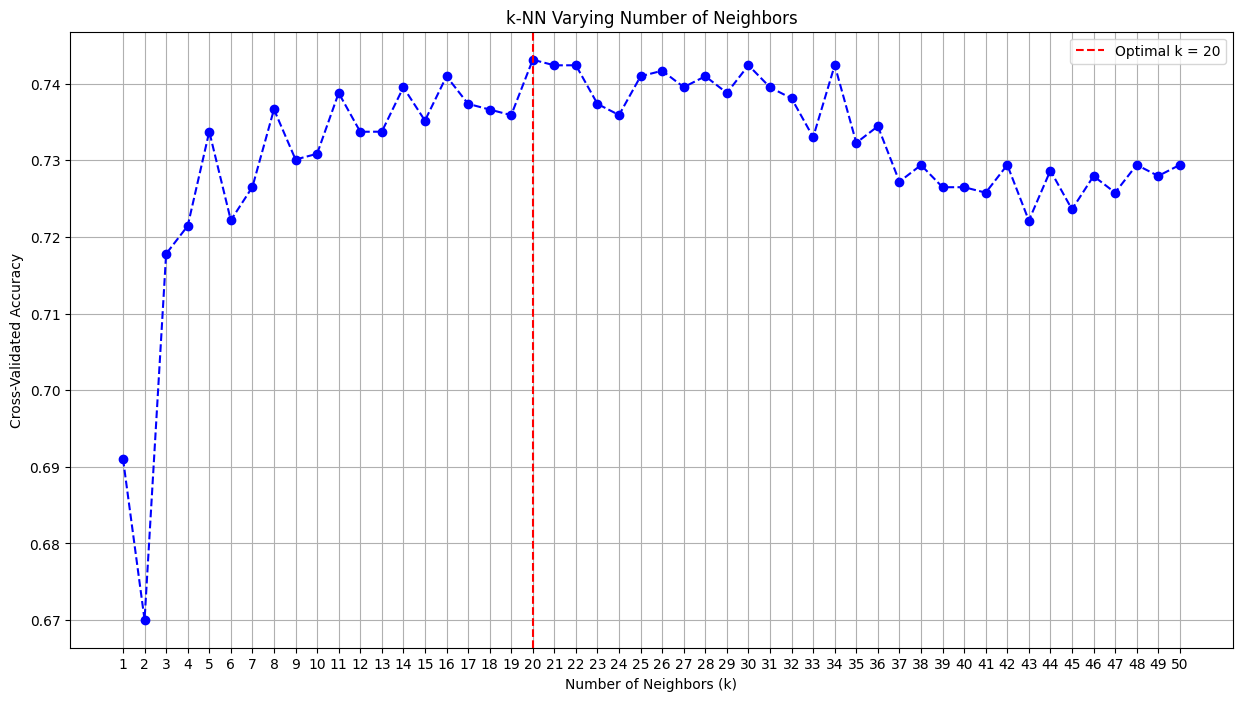

In [41]:
# Plot the cross-validation performance metrics
plt.figure(figsize=(15, 8))
plt.plot(k_values, cv_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Varying Number of Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.show()

In [61]:
# Train the k-NN classifier with the optimal k value on the entire training set
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {test_accuracy:.2f}')

Accuracy on test set: 0.70


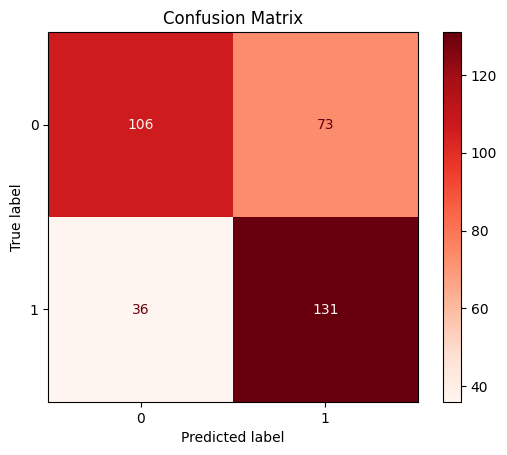

In [43]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

In [44]:
# Summarize cross-validation accuracy and test accuracy
print(f'Cross-validated accuracy (training): {optimal_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Cross-validated accuracy (training): 0.7431
Test accuracy: 0.6850


The optimal k value is 20 with a cross-validated accuracy of 0.743
The optimal k value is 38 with a test accuracy of 0.702


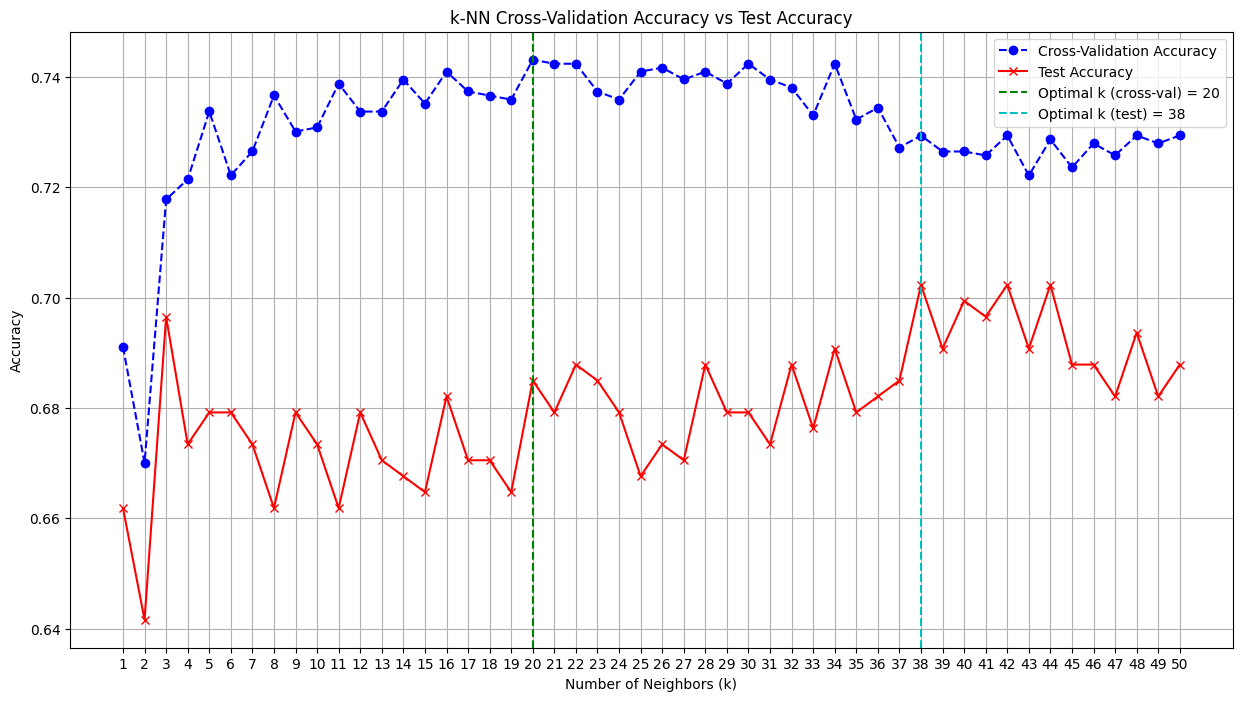

In [45]:
# Evaluate k-NN classifier for different k values using 10-fold cross-validation on the training set
k_values = range(1, 51)
cv_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Cross-validation accuracy
    cv_score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(cv_score.mean())
    # Train and test accuracy
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    test_scores.append(test_score)

# Find the optimal k value based on cross-validation accuracy
optimal_k = k_values[np.argmax(cv_scores)]
optimal_cv_accuracy = np.max(cv_scores)

optimal_k2 = k_values[np.argmax(test_scores)]
optimal_test_accuracy = np.max(test_scores)

print(f'The optimal k value is {optimal_k} with a cross-validated accuracy of {optimal_cv_accuracy:.3f}')
print(f'The optimal k value is {optimal_k2} with a test accuracy of {optimal_test_accuracy:.3f}')

# Plot the cross-validation accuracy and test accuracy
plt.figure(figsize=(15, 8))
plt.plot(k_values, cv_scores, marker='o', linestyle='--', color='b', label='Cross-Validation Accuracy')
plt.plot(k_values, test_scores, marker='x', linestyle='-', color='r', label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Cross-Validation Accuracy vs Test Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal k (cross-val) = {optimal_k}')
plt.axvline(x=optimal_k2, color='c', linestyle='--', label=f'Optimal k (test) = {optimal_k2}')
plt.legend()
plt.show()

# Logistic Regression

In [46]:
# Split the data into training and testing sets (80/20 split)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data 
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [47]:
from sklearn.linear_model import LogisticRegression

# Perform 10-fold cross-validation on the training set for logistic regression
log_reg = LogisticRegression()
cv_scores2 = cross_val_score(log_reg, X_train2, y_train2, cv=10, scoring='accuracy')

# Print cross-validation results
print(f'Cross-validation accuracy scores: {cv_scores2}')
print(f'Mean cross-validation accuracy: {cv_scores2.mean():.3f}')
print(f'Standard deviation of cross-validation accuracy: {cv_scores2.std():.3f}')

Cross-validation accuracy scores: [0.76978417 0.83453237 0.77536232 0.72463768 0.75362319 0.75362319
 0.76086957 0.75362319 0.82608696 0.76086957]
Mean cross-validation accuracy: 0.771
Standard deviation of cross-validation accuracy: 0.032


In [48]:
# Train the logistic regression model on the entire training set
log_reg.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred = log_reg.predict(X_test2)

# Evaluate the model on the test set
accuracy2 = accuracy_score(y_test2, y_pred)
print(f'Accuracy on test set: {accuracy2:.3f}')

Accuracy on test set: 0.746


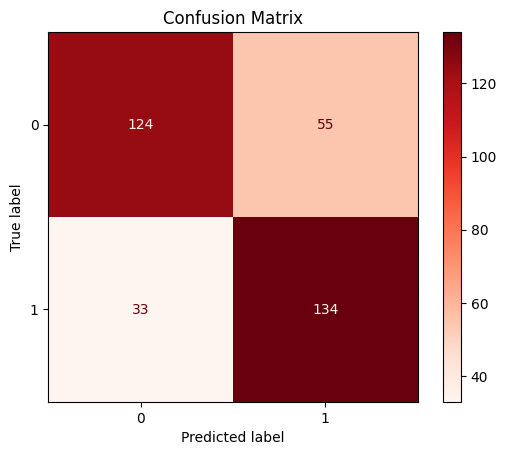

In [49]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

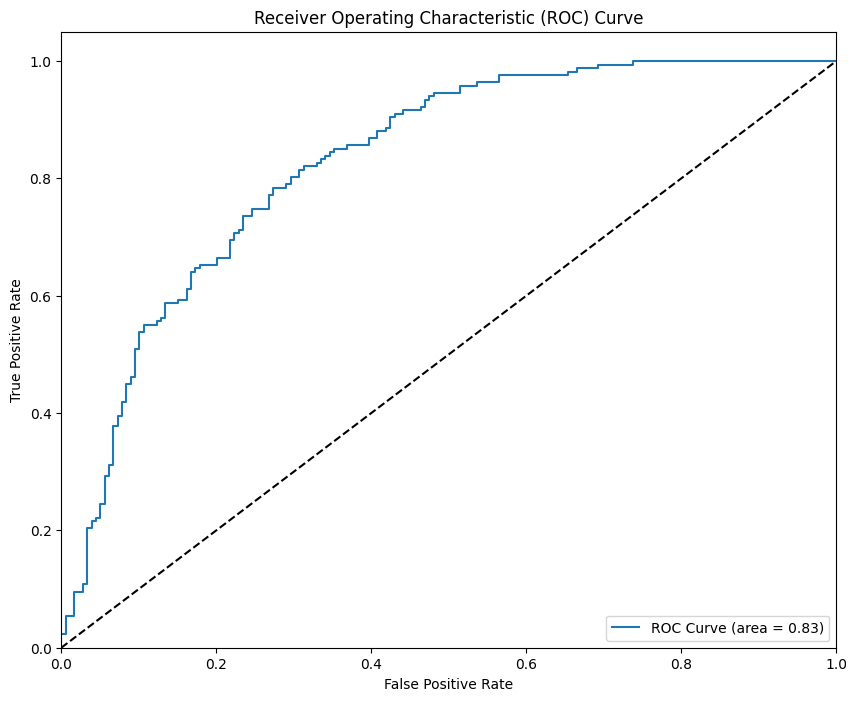

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob2 = log_reg.predict_proba(X_test2)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_prob2)
roc_auc = roc_auc_score(y_test2, y_prob2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Coef when using None Regularization: [[  4.8687479   -1.42216496  -1.48661785  -6.11335554  -1.38579843
  -11.90299462  10.33431149   5.50761853   2.94465909]]
------------------
Coef when using L1 Regularization: [[ 0.11982587  0.14085453  0.         -2.25765171  0.         -9.53064016
   8.02778332  3.86007491 -0.05723347]]
------------------
Coef when using L2 Regularization: [[-0.22863854  3.15298127  0.10734552 -1.32981242 -0.67314341 -5.10363882
   3.62635613  0.9490609  -0.24252837]]
------------------


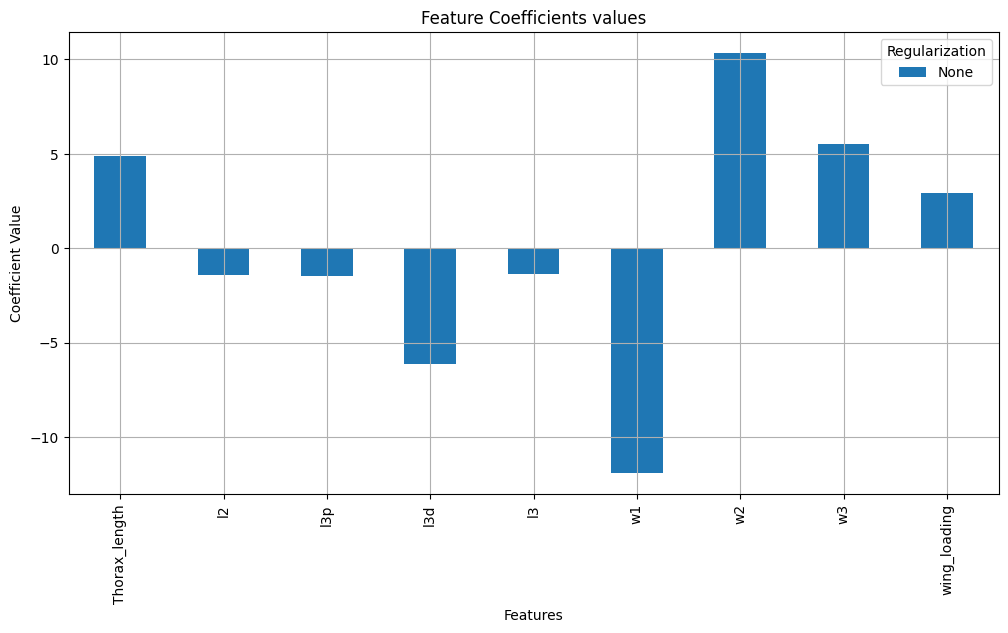

In [51]:
def fit_logistic(regularization=None, C=1.0):
    if regularization is None:
        model = LogisticRegression(penalty='l2', C=1e12, max_iter=1000)  # Use a very large C for no regularization
    elif regularization == 'L1':
        model = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)
    elif regularization == 'L2':
        model = LogisticRegression(penalty='l2', solver='lbfgs', C=C, max_iter=1000)
    else:
        raise ValueError("Invalid regularization type. Choose from: None, 'L1', 'L2'")
    
    model.fit(X_train2, y_train2)
    return model

# Train and obtain coefficients for each regularization type
regularizations = [None, 'L1', 'L2']
coefs = {}

for r in regularizations:
    model = fit_logistic(regularization=r)
    coefs[r] = model.coef_[0]
    print(f"Coef when using {r} Regularization: {model.coef_}")
    print("------------------")

# Extract the coefficients for no regularization
no_reg_coefs = coefs[None]

# Visualize the coefficients for no regularization
coefs_df = pd.DataFrame({'None': no_reg_coefs}, index=X.columns)
coefs_df.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Coefficients values')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(title='Regularization')
plt.grid(True)
plt.show()

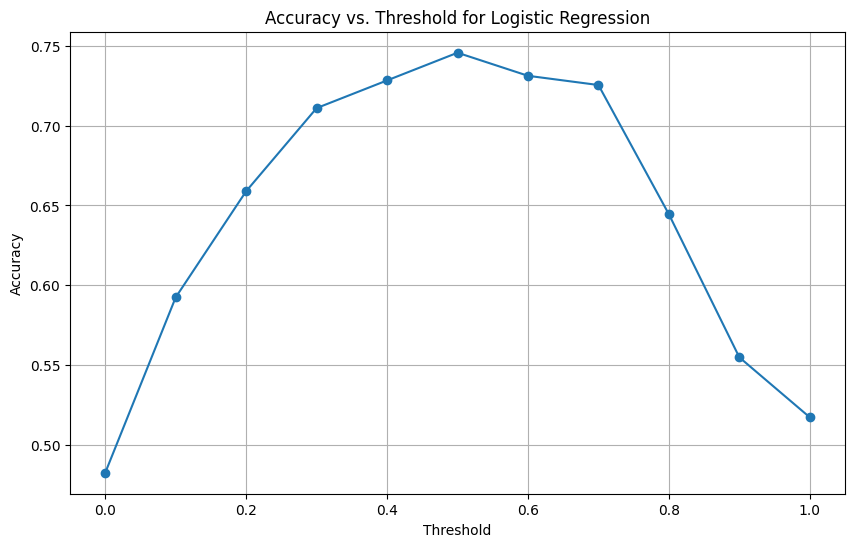

In [52]:
# Train the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train2, y_train2)

# Get the probabilities of the positive class
yprob_pos_class = logistic_regression_model.predict_proba(X_test2)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.0, 1.1, 0.1)
accuracies = []

# Iterate over thresholds to calculate accuracies
for threshold in thresholds:
    ypred_binary_thresholded = (yprob_pos_class >= threshold).astype(int)
    accuracy = accuracy_score(y_test2, ypred_binary_thresholded)
    accuracies.append(accuracy)


# Plot accuracy vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold for Logistic Regression')
plt.grid(True)
plt.show()

## With regularisation

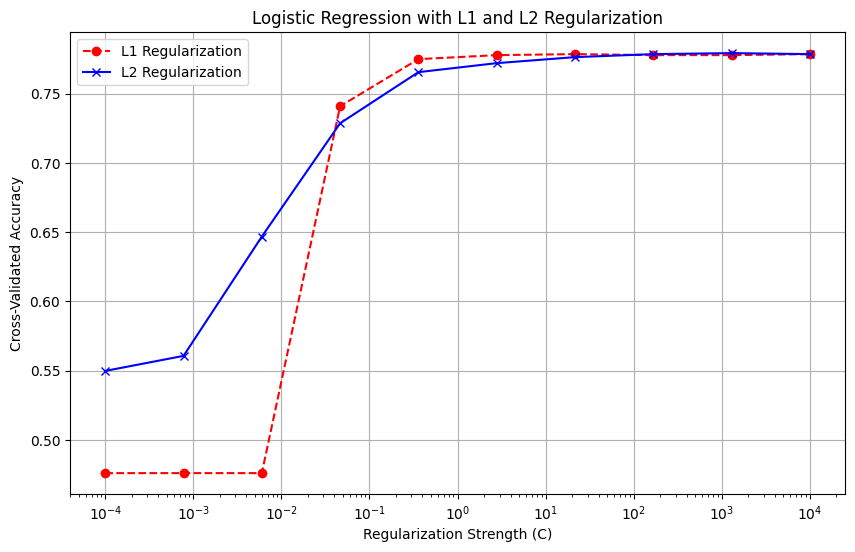

Best C for L1 Regularization: 21.54434690031882
Test Accuracy with L1 Regularization: 0.754
Best C for L2 Regularization: 1291.5496650148827
Test Accuracy with L2 Regularization: 0.751


In [55]:
# Define a range of regularization strengths
C_values = np.logspace(-4, 4, 10) 

# Lists to store cross-validation accuracies
l1_cv_scores = []
l2_cv_scores = []

# Perform cross-validation for each regularization strength
for C in C_values:
    # Logistic Regression with L1 regularization
    log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)
    l1_scores = cross_val_score(log_reg_l1, X_train2, y_train2, cv=10, scoring='accuracy')
    l1_cv_scores.append(l1_scores.mean())
    
    # Logistic Regression with L2 regularization
    log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=C, max_iter=1000)
    l2_scores = cross_val_score(log_reg_l2, X_train2, y_train2, cv=10, scoring='accuracy')
    l2_cv_scores.append(l2_scores.mean())

# Plot the cross-validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(C_values, l1_cv_scores, marker='o', linestyle='--', color='r', label='L1 Regularization')
plt.plot(C_values, l2_cv_scores, marker='x', linestyle='-', color='b', label='L2 Regularization')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Logistic Regression with L1 and L2 Regularization')
plt.legend()
plt.grid(True)
plt.show()

# Train and evaluate the final model with the best regularization strength
best_C_l1 = C_values[np.argmax(l1_cv_scores)]
best_log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=best_C_l1, max_iter=1000)
best_log_reg_l1.fit(X_train2, y_train2)
y_pred_l1 = best_log_reg_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test2, y_pred_l1)
print(f'Best C for L1 Regularization: {best_C_l1}')
print(f'Test Accuracy with L1 Regularization: {accuracy_l1:.3f}')

best_C_l2 = C_values[np.argmax(l2_cv_scores)]
best_log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=best_C_l2, max_iter=1000)
best_log_reg_l2.fit(X_train2, y_train2)
y_pred_l2 = best_log_reg_l2.predict(X_test2)
accuracy_l2 = accuracy_score(y_test2, y_pred_l2)
print(f'Best C for L2 Regularization: {best_C_l2}')
print(f'Test Accuracy with L2 Regularization: {accuracy_l2:.3f}')


In [63]:
best_l1_cv_score = max(l1_cv_scores)
best_l2_cv_score = max(l2_cv_scores)

print(f'Best Cross-Validated Accuracy for L1 Regularization: {best_l1_cv_score:.3f}')
print(f'Best Cross-Validated Accuracy for L2 Regularization: {best_l2_cv_score:.3f}')

Best Cross-Validated Accuracy for L1 Regularization: 0.779
Best Cross-Validated Accuracy for L2 Regularization: 0.779


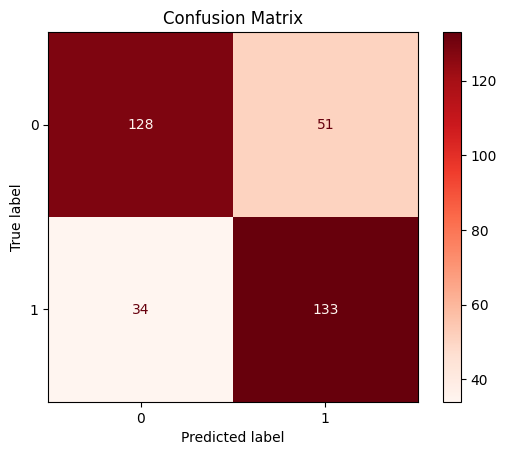

In [57]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test2, y_pred_l1)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_log_reg_l2.classes_)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

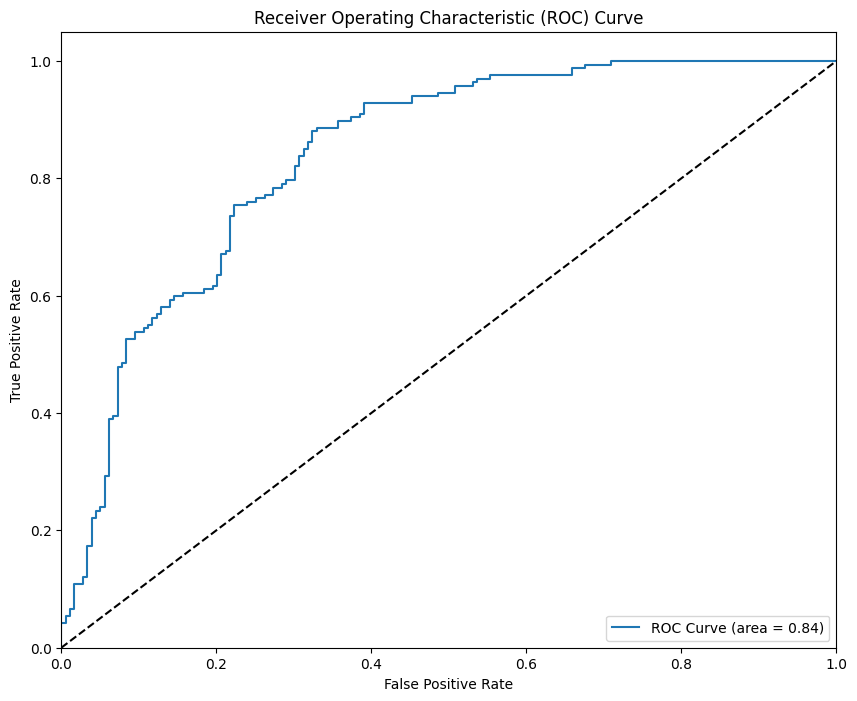

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob2 = best_log_reg_l2.predict_proba(X_test2)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_prob2)
roc_auc = roc_auc_score(y_test2, y_prob2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Coef when using None Regularization: [[  4.8687479   -1.42216496  -1.48661785  -6.11335554  -1.38579843
  -11.90299462  10.33431149   5.50761853   2.94465909]]
------------------
Coef when using L1 Regularization: [[ 0.11886777  0.14371779  0.         -2.25726035  0.         -9.52765861
   8.02496846  3.85798569 -0.05782242]]
------------------
Coef when using L2 Regularization: [[-0.22863854  3.15298127  0.10734552 -1.32981242 -0.67314341 -5.10363882
   3.62635613  0.9490609  -0.24252837]]
------------------


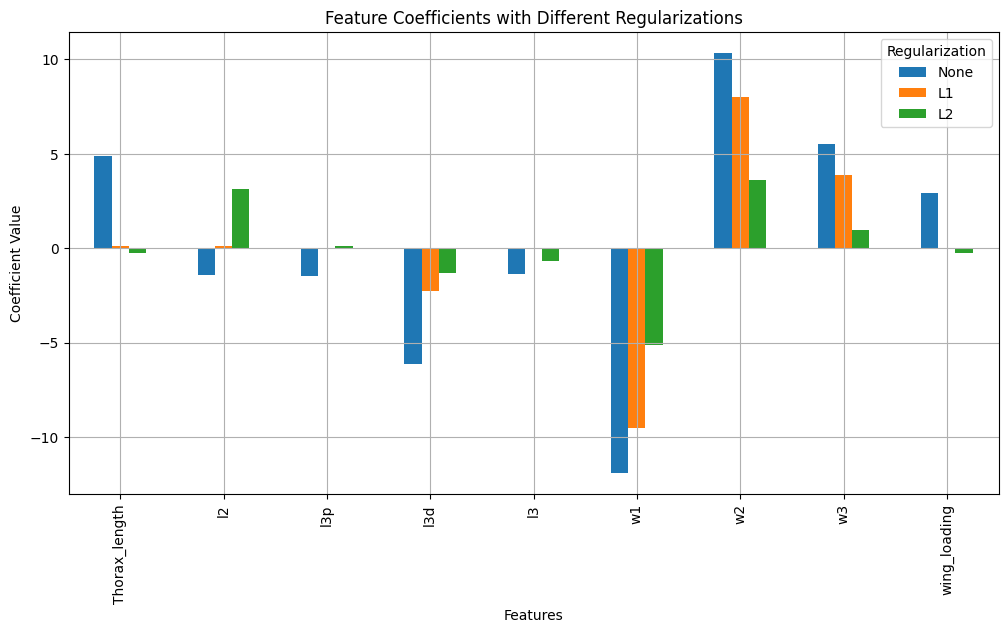

In [56]:

# Define a function to train logistic regression with different regularization types
def fit_logistic(regularization=None, C=1.0):
    if regularization is None:
        model = LogisticRegression(penalty='l2', C=1e12, max_iter=1000)  # Use a very large C for no regularization
    elif regularization == 'L1':
        model = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)
    elif regularization == 'L2':
        model = LogisticRegression(penalty='l2', solver='lbfgs', C=C, max_iter=1000)
    else:
        raise ValueError("Invalid regularization type. Choose from: None, 'L1', 'L2'")
    
    model.fit(X_train2, y_train2)
    return model

# Train and obtain coefficients for each regularization type
regularizations = [None, 'L1', 'L2']
coefs = {}

for r in regularizations:
    model = fit_logistic(regularization=r)
    coefs[r] = model.coef_[0]
    print(f"Coef when using {r} Regularization: {model.coef_}")
    print("------------------")

# Visualize the coefficients for each regularization type
coefs_df = pd.DataFrame(coefs, index=X.columns)
coefs_df.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Coefficients with Different Regularizations')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(title='Regularization')
plt.grid(True)
plt.show()